In [68]:
# !pip install randomcolor
randomcolor.RandomColor().generate()[0]

'#c051d6'

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import randomcolor


In [4]:
# Study data files
sales_extended_path = "data/car_sales_extended.csv" #just the original csv without null values and an additional, simplified ‘type’ column added to the end
car_sales_path = "data/car_sales_clean.csv" #the combination of the two pinned .csv files… including model year, make, model, and price. The model year ranges from 1990 to 2020

# Read the mouse data and the study results
sales_extended = pd.read_csv(sales_extended_path)
car_sales = pd.read_csv(car_sales_path)


In [5]:
sales_extended

,Year,Make,Model,Price (USD)
0,2015,Kia,Sorento,21500.00
1,2015,Kia,Sorento,21500.00
2,2014,BMW,3 Series,30000.00
3,2015,Volvo,S60,27750.00
4,2014,BMW,6 Series Gran Coupe,67000.00
...,...,...,...,...
482320,2018,BMW,3 Series,31676.02
482321,2011,Hyundai,Sonata,67942.46
482322,2011,Chevrolet,Impala,64342.88
482323,2020,BMW,X3,50060.30


In [11]:
sales_extended.columns

Index(['Year', 'Make', 'Model', 'Price (USD)'], dtype='object')

In [28]:
sales_extended['Make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

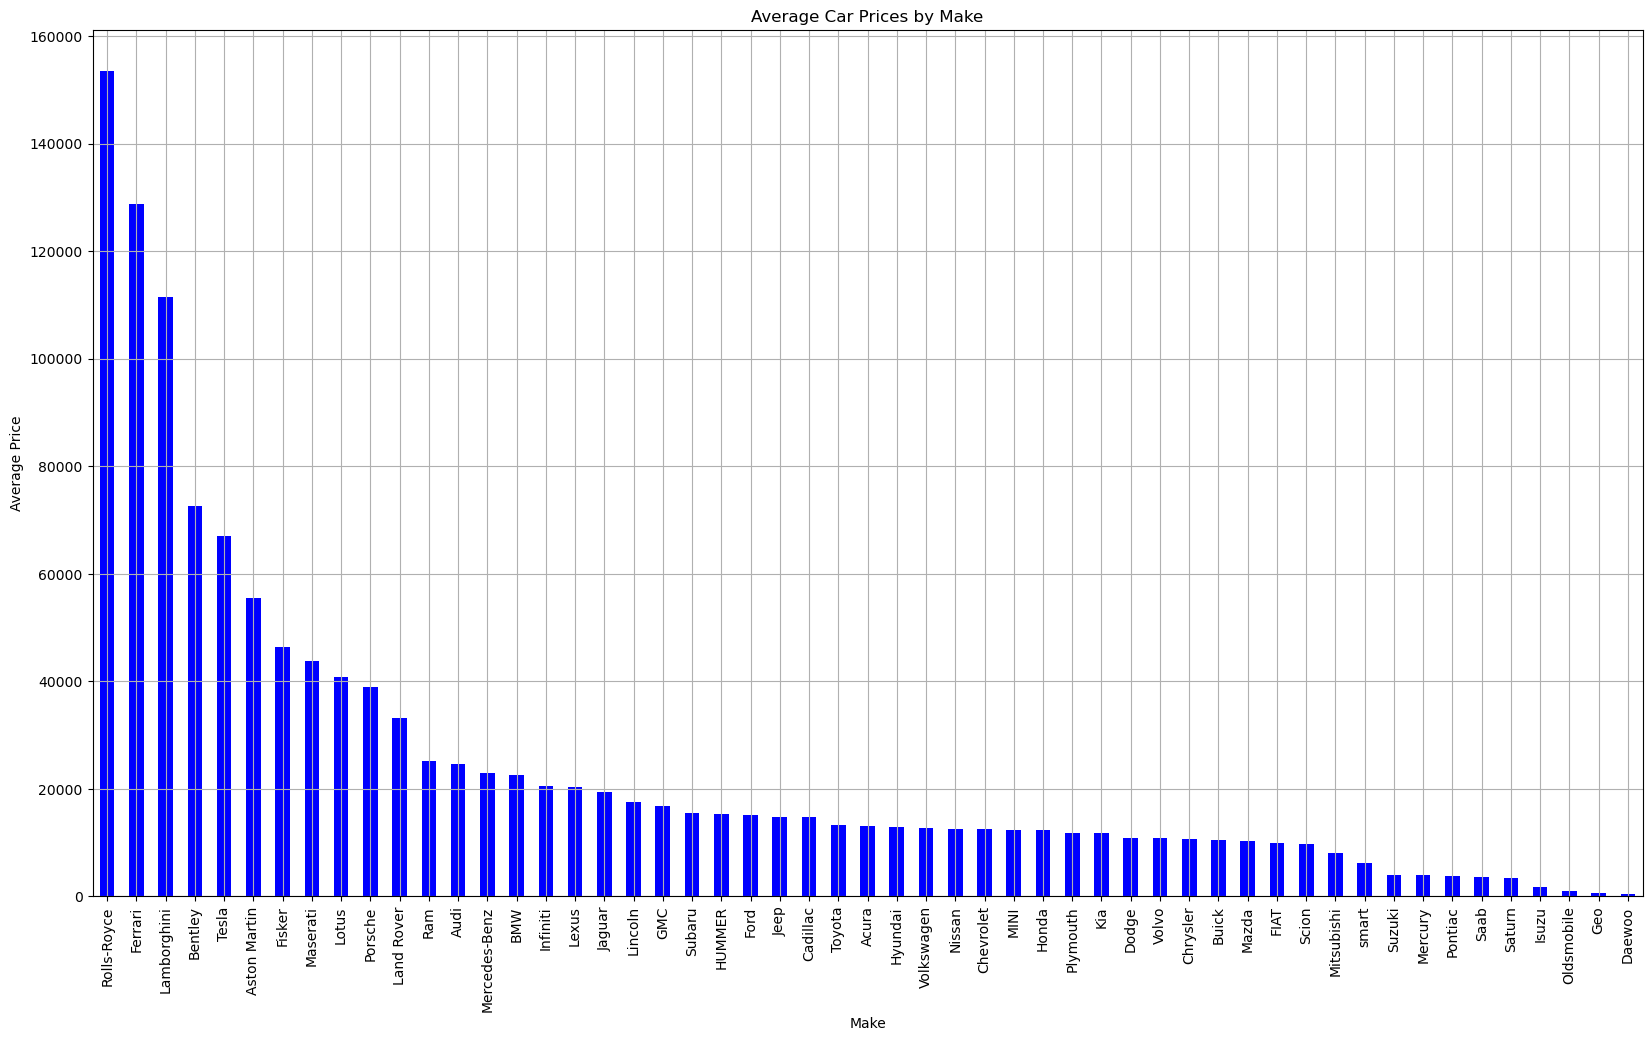

In [48]:
# Calculate average prices by brand

average_prices_by_make = sales_extended.groupby('Make')['Price (USD)'].mean().sort_values(ascending=False)

# Create a bar chart for average car prices by brand

plt.figure(figsize=(20,11.25))

average_prices_by_make.plot(kind='bar', color='blue', alpha=1, align='center')

plt.title('Average Car Prices by Make')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(True)
# plt.tight_layout()

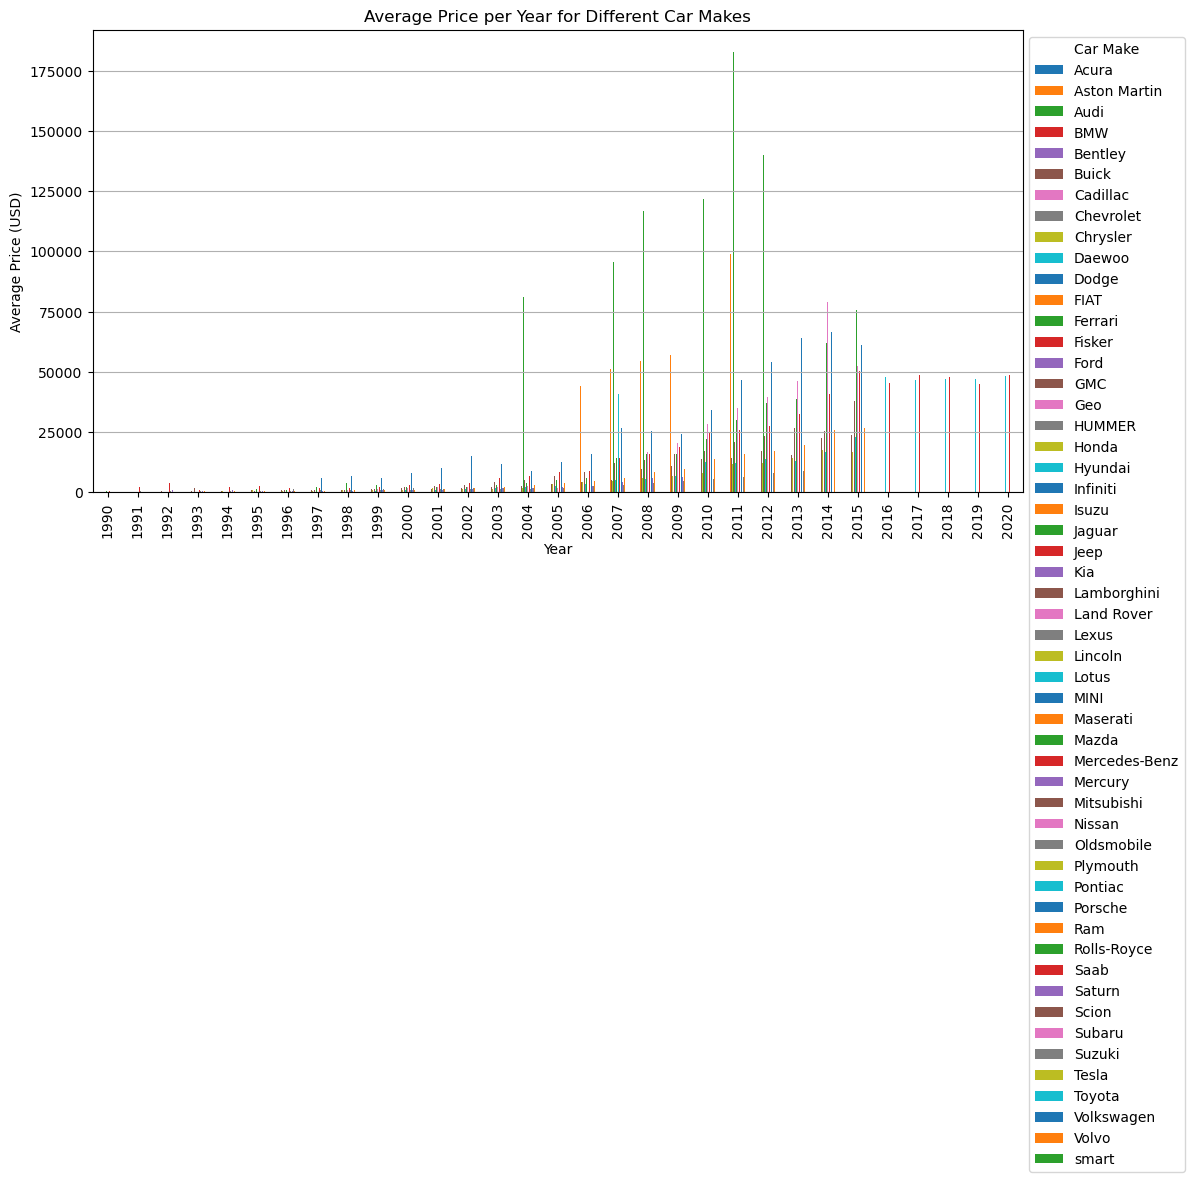

In [27]:
# Bar Plot - Average Price per Year for Different Car Makes
avg_price_per_year = sales_extended.groupby(['Year', 'Make'])['Price (USD)'].mean().unstack()
avg_price_per_year.plot(kind='bar', figsize=(20, 15))
plt.title('Average Price per Year for Different Car Makes')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.legend(title='Car Make', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

In [58]:
line_data_df = sales_extended[['Year', 'Price (USD)','Make']].copy()
line_data_df = line_data_df.groupby(['Year', 'Make']).mean().reset_index()


In [59]:
line_data_df[line_data_df["Year"]==1990]


,Year,Make,Price (USD)
0,1990,Cadillac,325.000000
1,1990,Chevrolet,6020.000000
2,1990,Honda,357.142857
3,1990,Jaguar,550.000000
4,1990,Lexus,545.000000
5,1990,Mazda,1565.000000
6,1990,Mercedes-Benz,275.000000
7,1990,Nissan,200.000000
8,1990,Toyota,400.000000


In [61]:
car_makes = line_data_df[line_data_df["Year"]==1990]['Make'].unique().tolist()
car_makes


['Cadillac',
 'Chevrolet',
 'Honda',
 'Jaguar',
 'Lexus',
 'Mazda',
 'Mercedes-Benz',
 'Nissan',
 'Toyota']

In [ ]:
# fulldata = line_data_df.groupby['Make', 'Year']

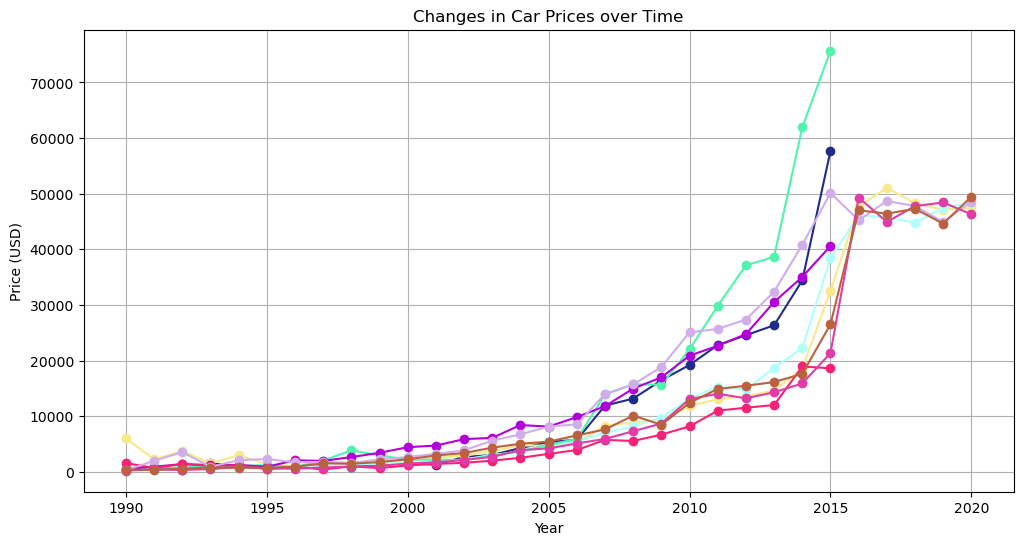

In [69]:
#Line Plot - Changes in Car Prices over Time
plt.figure(figsize=(12, 6))
for make in car_makes:
    temp_df = line_data_df[line_data_df['Make']==make]
    color = randomcolor.RandomColor().generate()[0]
    plt.plot(temp_df['Year'], temp_df['Price (USD)'], marker='o', color=color)
plt.title('Changes in Car Prices over Time')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

/var/folders/y3/zcs62g454h39dqrx9rdyq4r80000gn/T/ipykernel_28678/3951383741.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=sales_extended, x='Year', y='Price (USD)', hue='Make', ci=None)


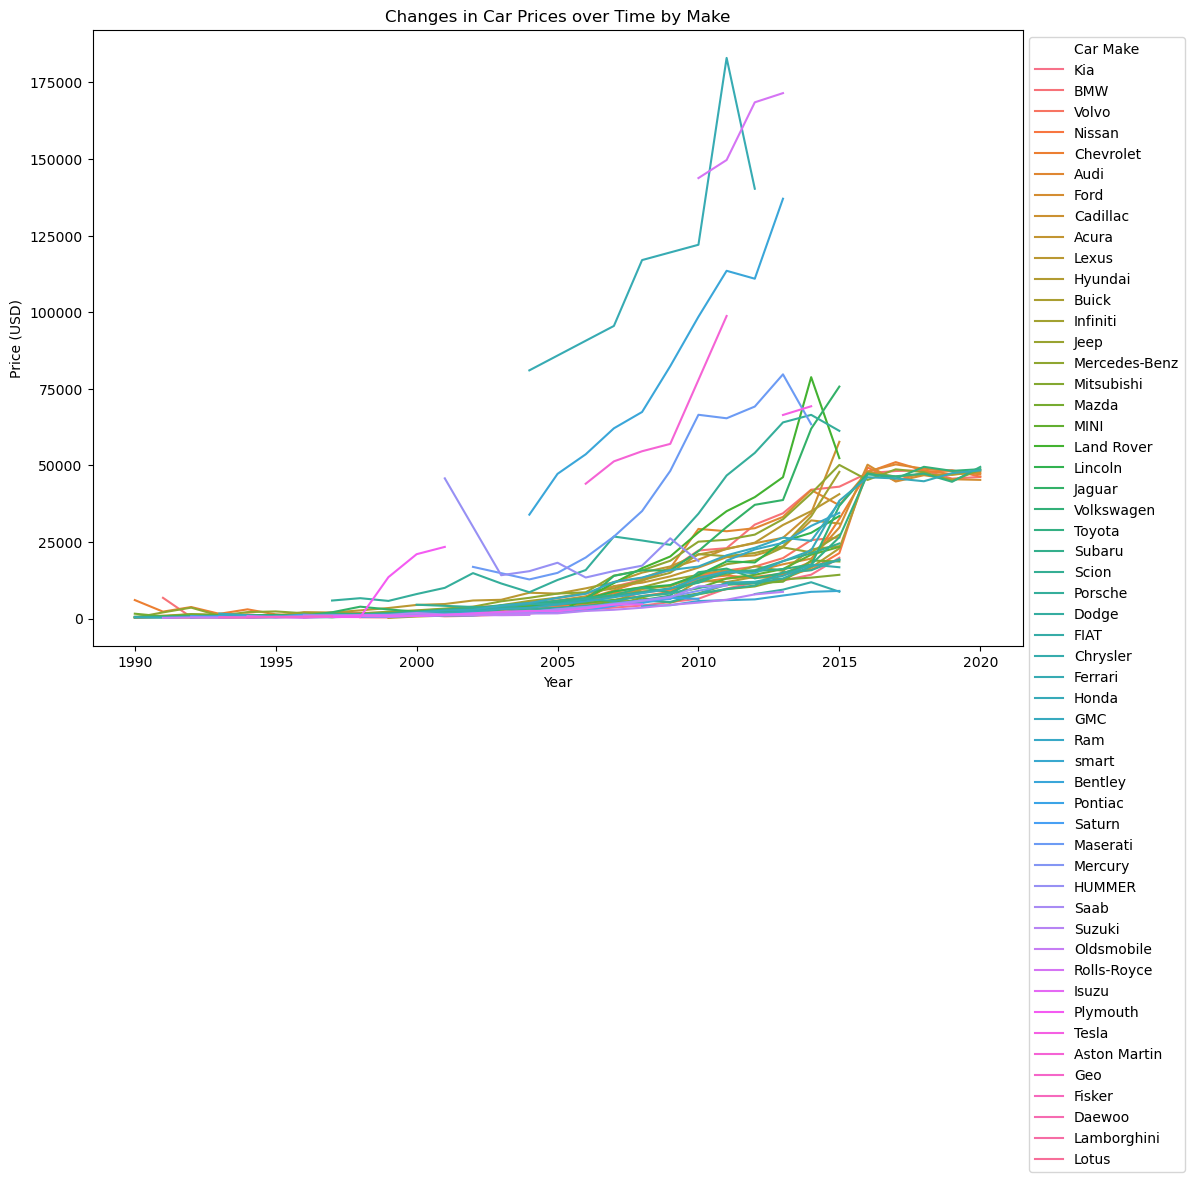

In [32]:
# Create a faceted line plot based on car make
plt.figure(figsize=(12, 8))
sns.lineplot(data=sales_extended, x='Year', y='Price (USD)', hue='Make', ci=None)
plt.title('Changes in Car Prices over Time by Make')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend(title='Car Make', bbox_to_anchor=(1, 1))
plt.show()

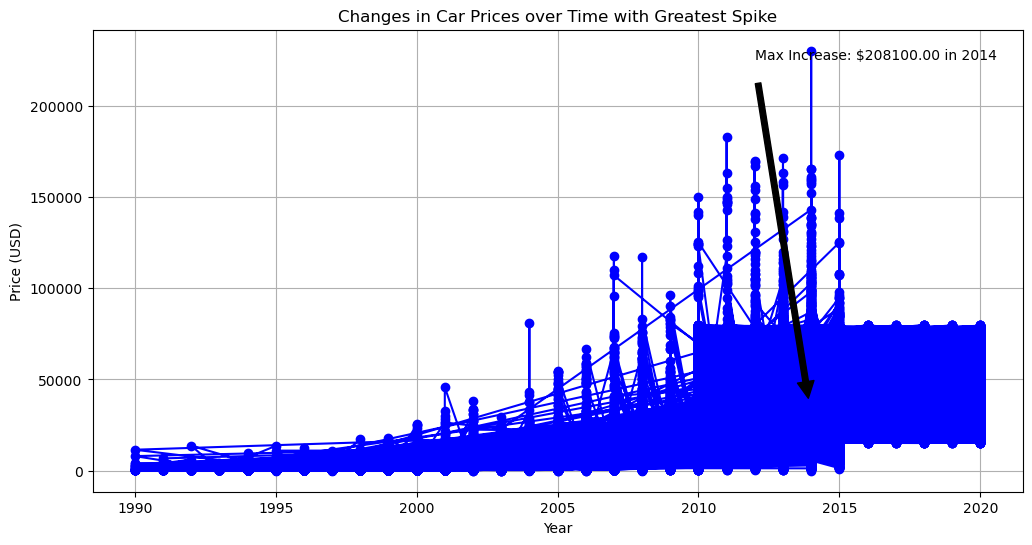

In [36]:
# Calculate price change between consecutive years for each car make in sales_extended DataFrame
sales_extended['Price Change'] = sales_extended.groupby('Make')['Price (USD)'].diff()

# Find the maximum price increase in sales_extended DataFrame
max_increase = sales_extended['Price Change'].max()
max_increase_period = sales_extended.loc[sales_extended['Price Change'] == max_increase, 'Year']

# Visualize the period with the greatest spike in prices in sales_extended DataFrame
plt.figure(figsize=(12, 6))
plt.plot(sales_extended['Year'], sales_extended['Price (USD)'], marker='o', color='b', linestyle='-')
plt.title('Changes in Car Prices over Time with Greatest Spike')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.annotate(f'Max Increase: ${max_increase:.2f} in {max_increase_period.values[0]}', 
             xy=(max_increase_period.values[0], sales_extended.loc[sales_extended['Year'] == max_increase_period.values[0], 'Price (USD)'].values[0]),
             xytext=(max_increase_period.values[0] - 2, sales_extended['Price (USD)'].max() - 5000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)
plt.show()

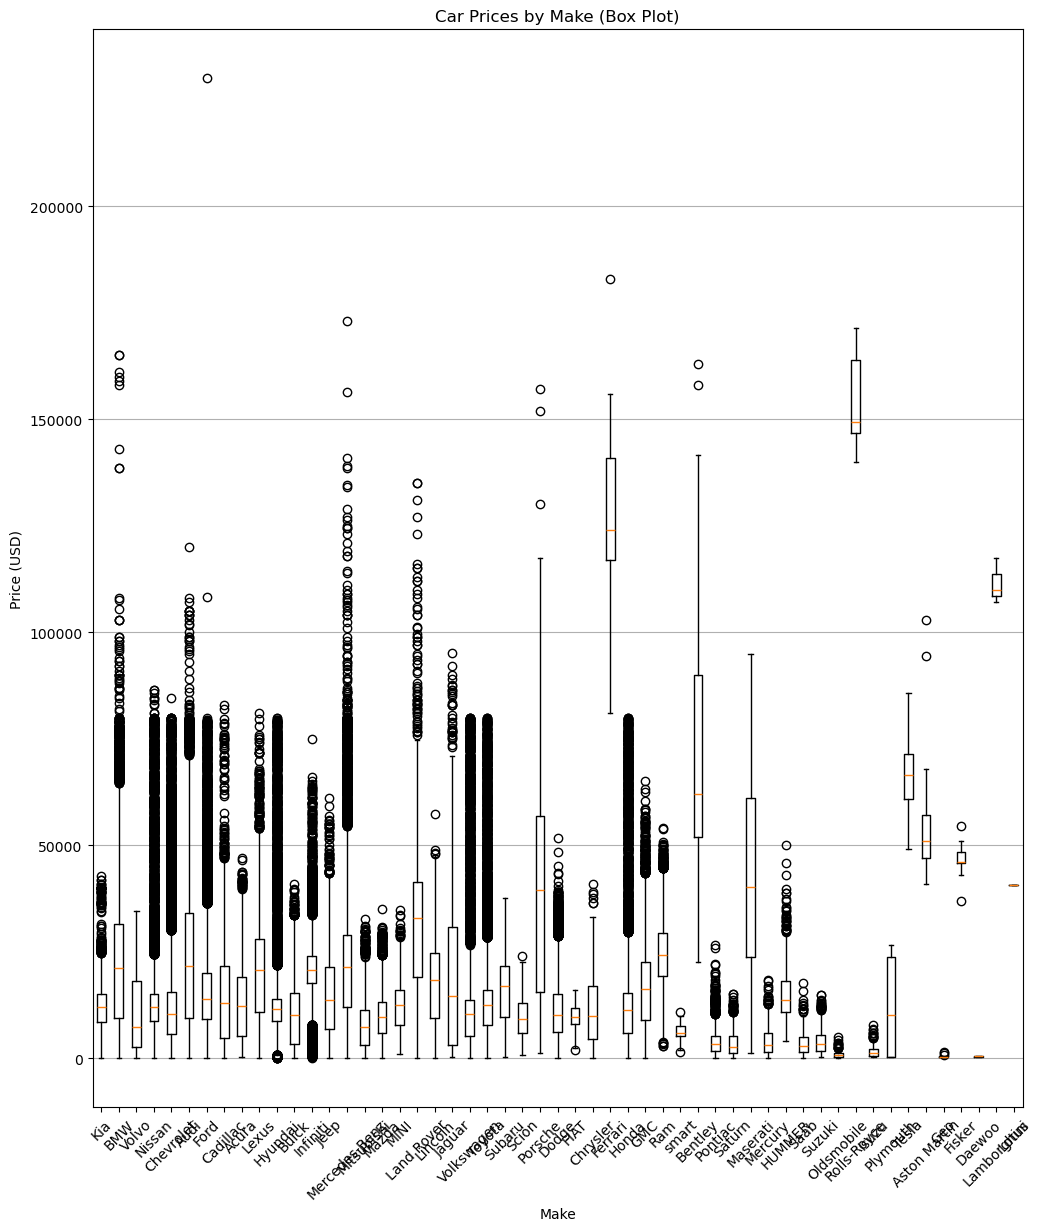

In [23]:
# Create a box plot of car prices by brand

plt.figure(figsize=(12, 14))

plt.boxplot([sales_extended[sales_extended['Make'] == make]['Price (USD)'] for make in sales_extended['Make'].unique()], labels=sales_extended['Make'].unique())

plt.title('Car Prices by Make (Box Plot)')
plt.xlabel('Make')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [6]:
car_sales

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Sedan
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Sedan
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT),Sedan
472321,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Truck
472322,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),SUV
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),Sedan


In [9]:
car_sales.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'type'],
      dtype='object')